# California Housing Price Prediction¶

The purpose of the project is to predict median house values in Californian districts, given many features from these districts.

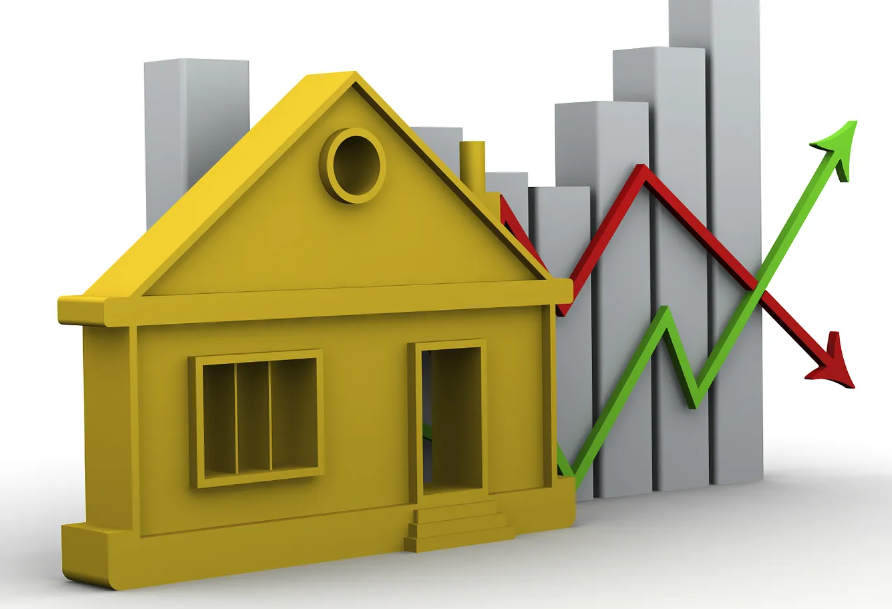

In [44]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
sns.set()

In [45]:
# Replace NaN values with the mean along each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [46]:
#read the data file
housing = pd.read_csv("housing.csv")

# Dataset Overview
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [7]:
#Data Overview
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
#Row-Column
housing.shape

(20640, 10)

In [9]:
#details
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
#Null check
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Data Analysis

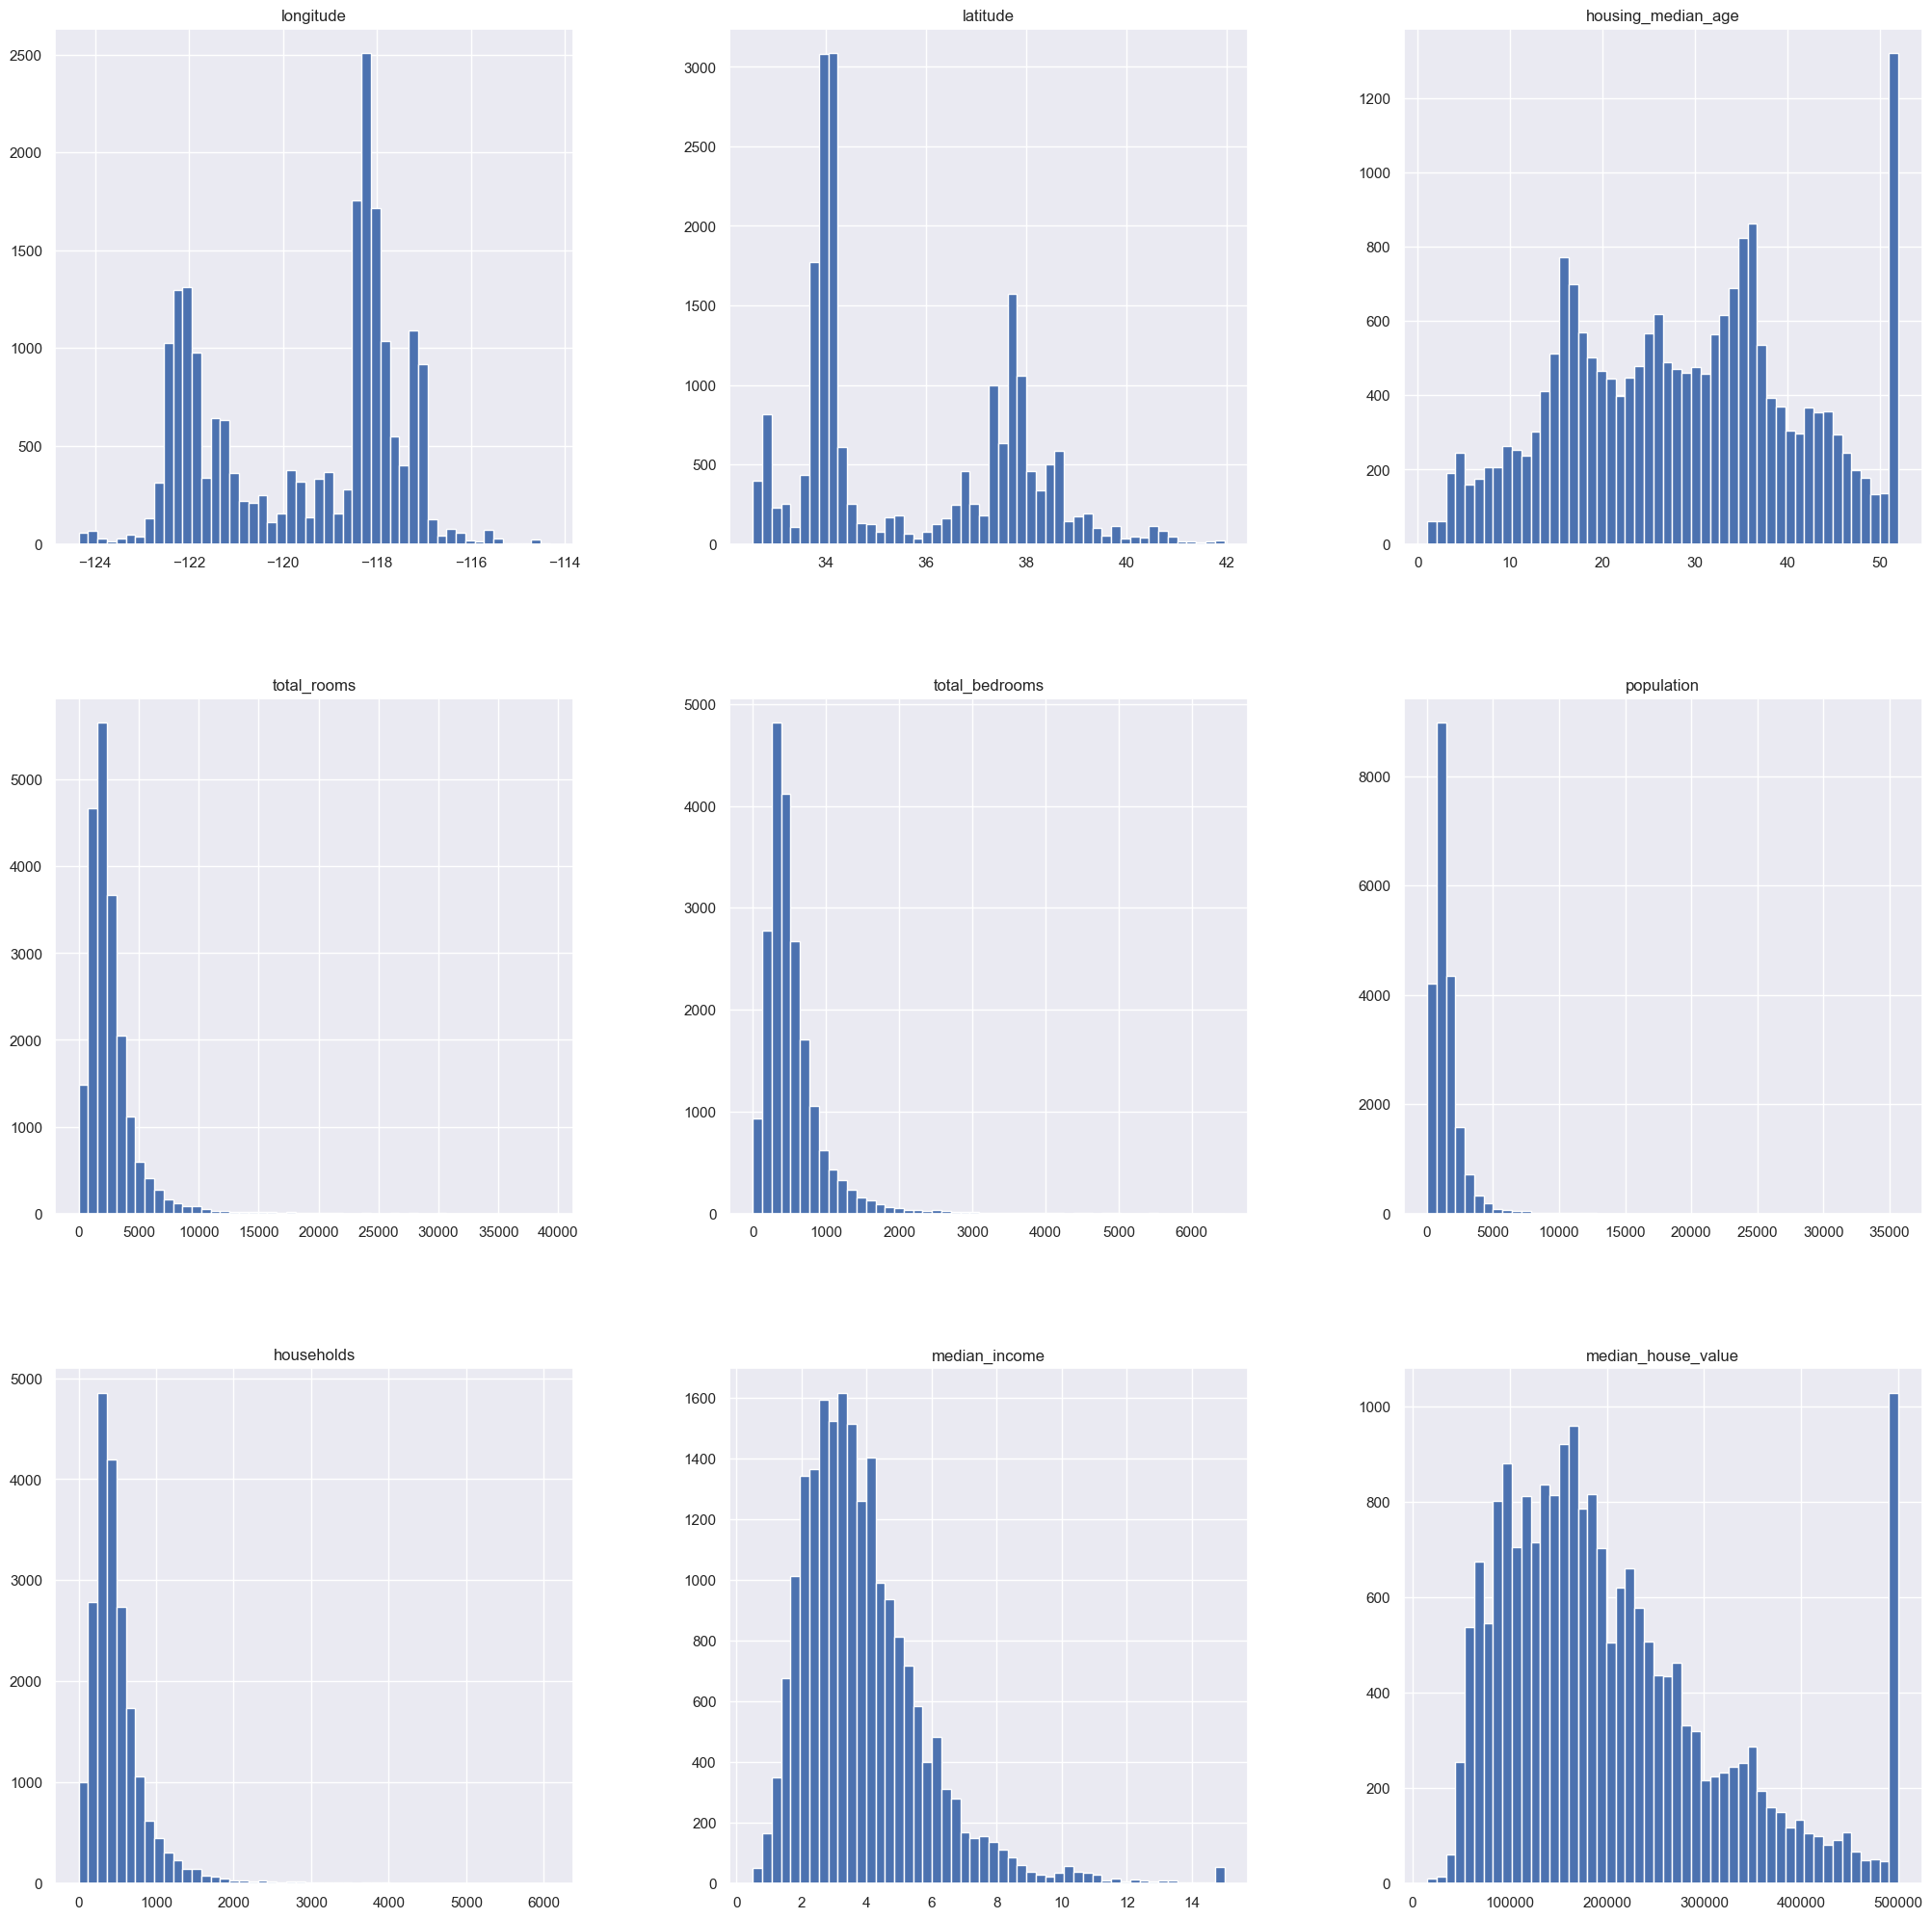

In [13]:
# Plotting histograms for different features
housing.hist(figsize=(25,25),bins=50)
plt.show()

### Establishing Correlation

In [15]:
hcorr = housing.corr(numeric_only=True)
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# heatmap using seaborn

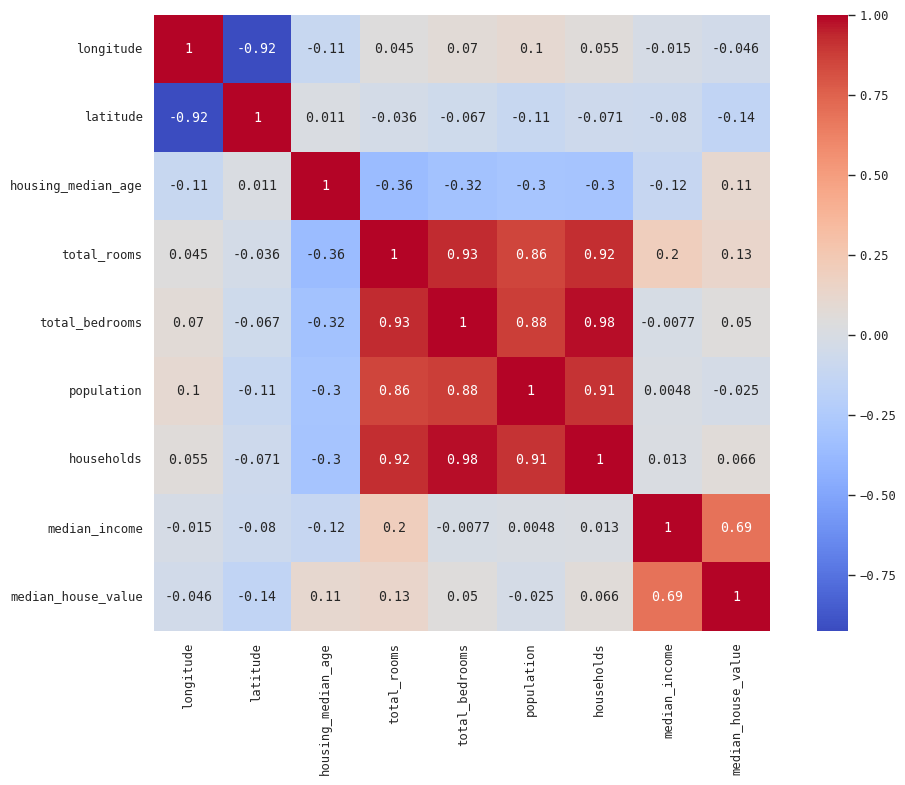

In [27]:
#set the context for plotting 
sns.set(context="paper",font="monospace")
housing_corr_matrix = housing.corr(numeric_only=True)
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#draw the heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap='coolwarm',annot=True );

# Removing Outliers

In [47]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(housing[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = housing[~housing[column].isin(data[column])]
    return outlierRemoved

In [48]:
#get the outlier
df_outliersRemoved = getOutliers(housing,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


# Impute the missing values in the data set

In [49]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [50]:
#statistics for missing values
print ("Total_bedrooms column Mode is  "+str(housing["total_bedrooms"].mode())+"\n")
print(housing["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
Name: total_bedrooms, dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


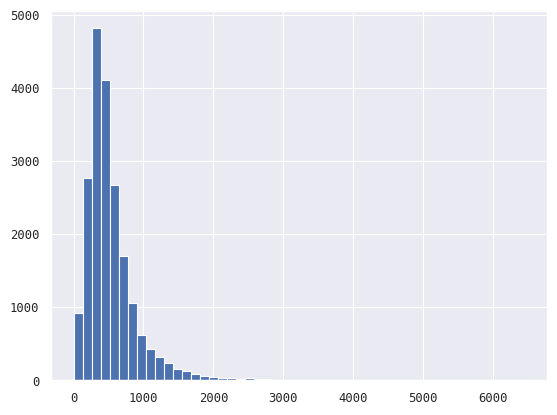

In [51]:
total_bedroms = housing[housing["total_bedrooms"].notnull()]["total_bedrooms"]#["total_bedrooms"]
total_bedroms.hist(bins=50)
plt.show()

In [52]:
print(housing.iloc[:,4:5].head())
imputer.fit(housing.iloc[:,4:5])
housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Label encode for categorical feature (ocean_proximity)

In [53]:
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing['ocean_proximity'].describe()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


count    20640.000000
mean         1.165843
std          1.420662
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: ocean_proximity, dtype: float64

# Split the dataset into 80% train and 20% test dataset¶

Feature and Target segregation

In [54]:
housing_ind = housing.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = housing["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252                3  
1      2401.0      1138.0         8.3014                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3  
Medain Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [55]:
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [56]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1


# Standardize training and test datasets.

In [57]:
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================

independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -1.12426599e-01]
 [ 6.09747178e-02 -2.35490539e-01  1.10435019e-01  1.38415277e-01
  -1.49476515e-03  1.21850767e-01  2.20531996e-01 -7.08659050e-01
  -1.12426599e-01]
 [-1.42487026e+00  1.00947776e+00  1.85617335e+00  5.46309967e-01
  -1.49476515e-03 -1.02419310e-01  1.21539643e+00 -2.104

# Perform Linear Regression
Predict output for test dataset using the fitted model. Print root mean squared error (RMSE) from Linear Regression.

In [58]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207194.69373788778
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


In [59]:
#predict on the test data
y_pred = linearRegModel.predict(X_test)

In [60]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

4128
4128
[ 75616.18733782 166419.13655163 264751.07303087 275770.17606472
 278280.66805524]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


### Comparison between Actual and Predicted values(training model - LinearRegression)

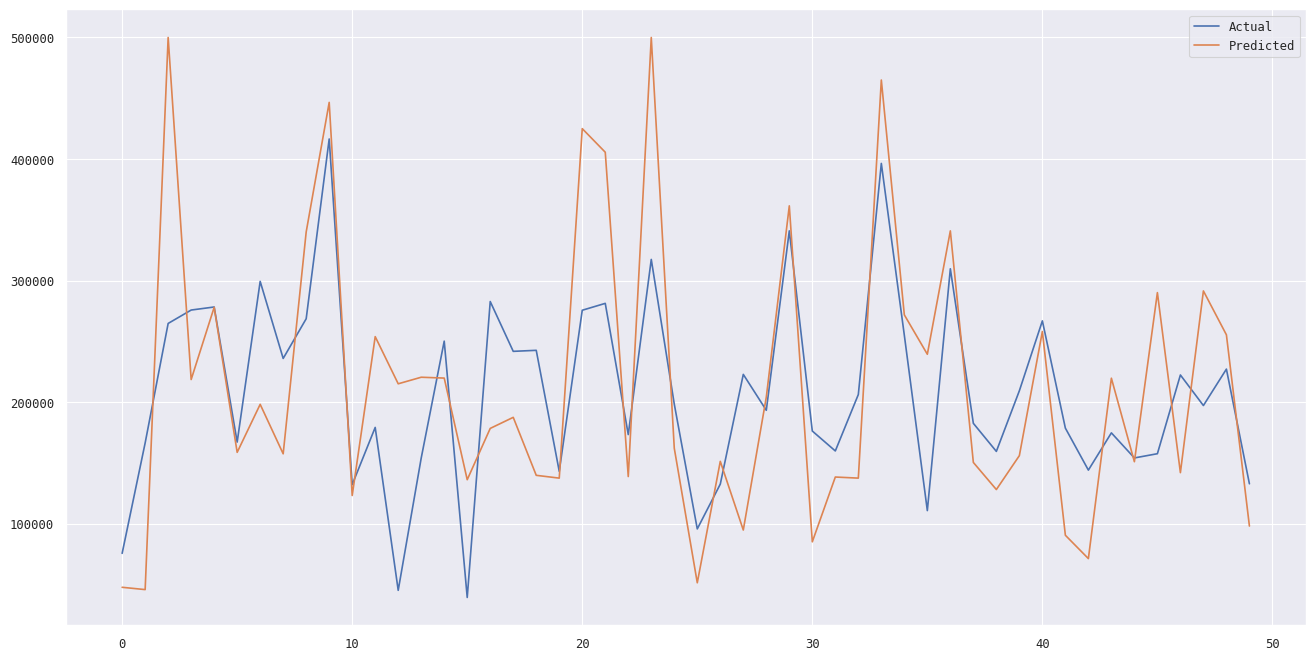

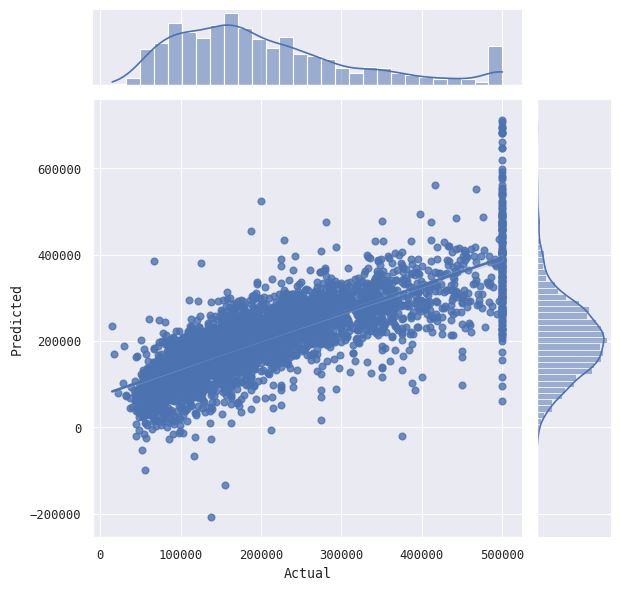

In [63]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg');

# Root Mean Squared Error (RMSE)

In [88]:
print("Root Mean Square Error in Test data for RandomForest is: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Root Mean Square Error in Training data for LinearRegression is : ",np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

Root Mean Square Error in Test data for RandomForest is:  71098.6998205003
Root Mean Square Error in Training data for LinearRegression is :  69361.0714290645


# Perform Decision Tree Regression

In [71]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [72]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 60503.2556391 ,  75919.52054795, 478283.56097561, ...,
       488611.25      ,  75919.52054795, 211563.96963563])

In [73]:
print(len(dtReg_y_pred))
print(len(y_test))
print(dtReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[ 60503.2556391   75919.52054795 478283.56097561 293759.82867133
 263196.4739726 ]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


In [85]:
# rmse
print("Root Mean Square Error for DecisonTree is : ",np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))

Root Mean Square Error for DecisonTree is :  60800.051233642334


### Comparison between Actual and Predicted values(training model - DecisonTree)

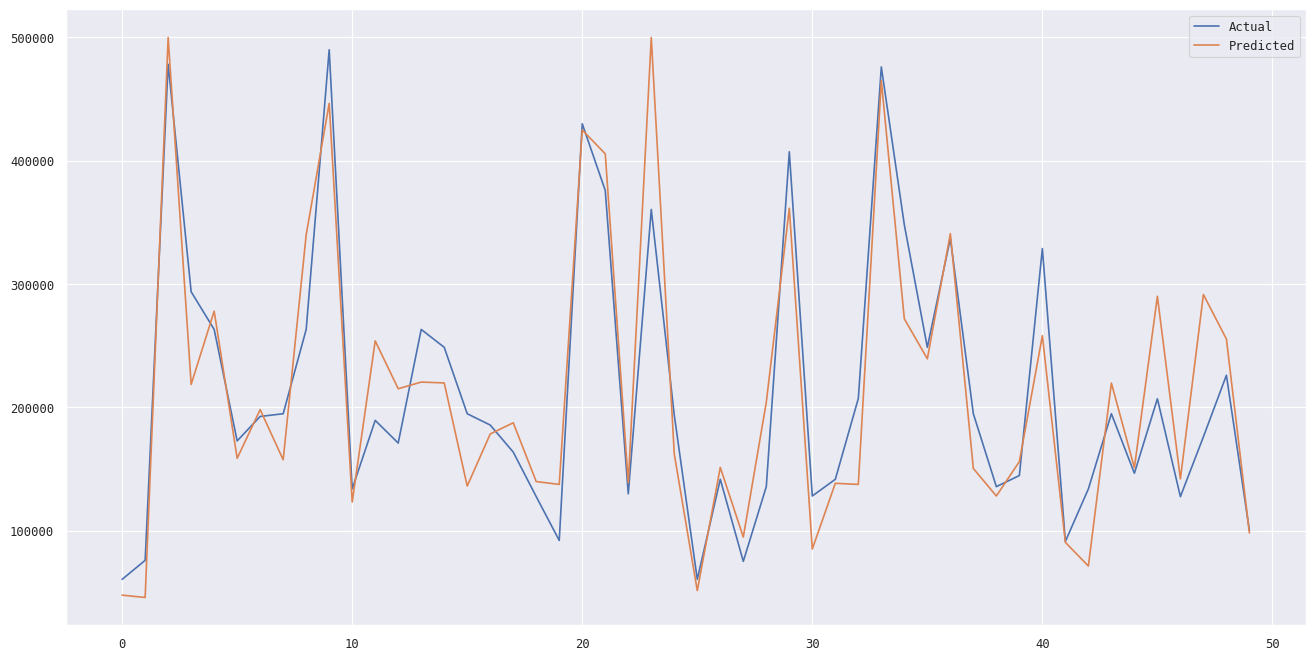

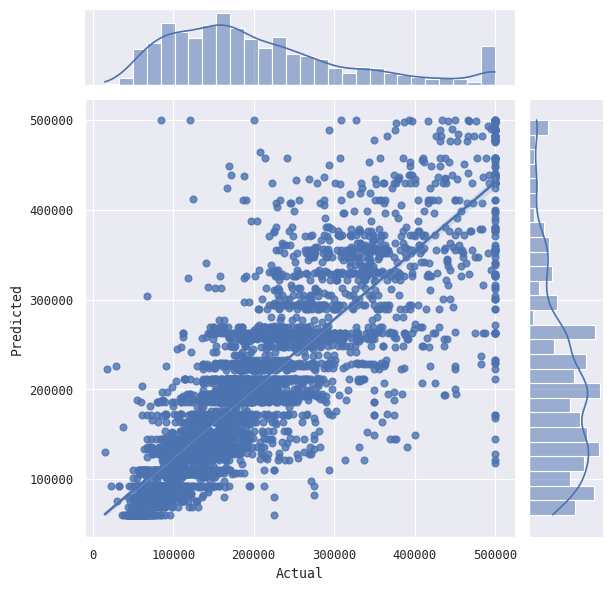

In [76]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")
plt.show()

# Perform Random Forest Regression

In [78]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [79]:
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[ 56690.   67660.  476507.3 269610.  276803.4]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


In [83]:
print("Root Mean Square Error for RandomForest is : " , np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

Root Mean Square Error for RandomForest is :  50199.41275011677


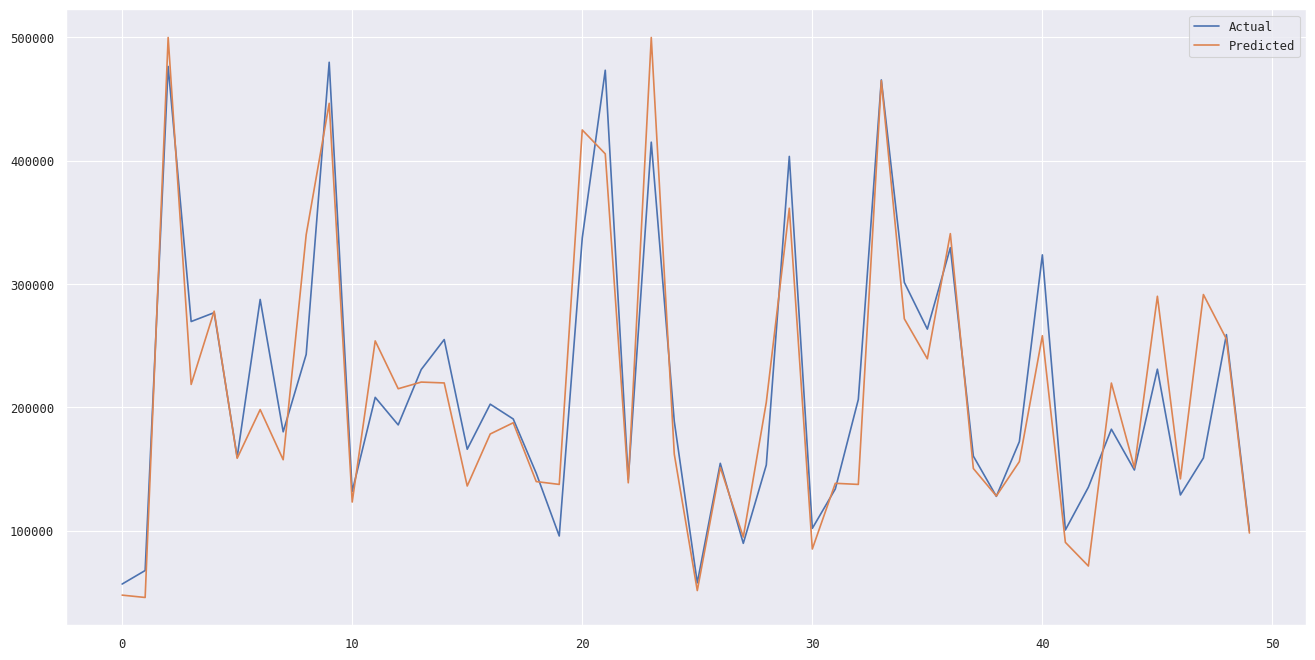

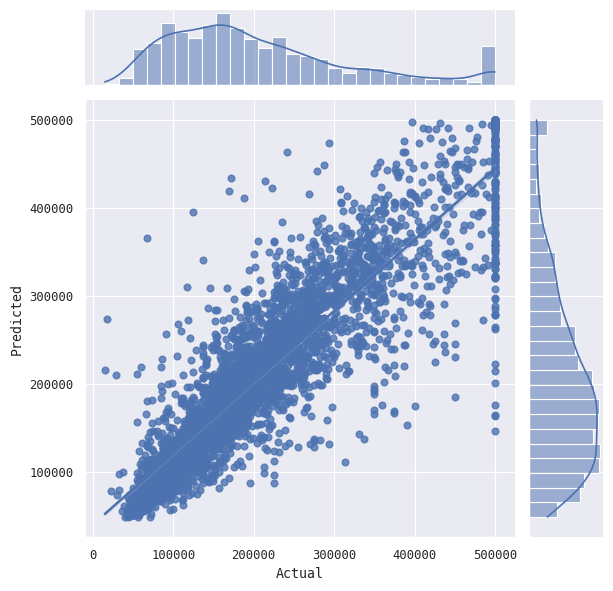

In [89]:
test = pd.DataFrame({'Predicted':rfReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# Fine Tune the Model

try different combinations of hyperparameters of a model: 

a. the following example trys 18 different combinations of hyperparameters and find the best one 

b. you can also use Randomized Search to try more combinations when the search space is very large
combine the best performing models

In [96]:
# use GridSearch to find best hyperparameter combinations
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},  # try 3x4=12 combinations
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},  # try 2x3=6 combinations
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')  
# each model is trained 5 times, so (12+6)*5 = 80 rounds of training in total

grid_search.fit(X_train,y_train)
grid_search.best_params_  # best parameters

{'max_features': 4, 'n_estimators': 30}

In [97]:
 # best estimators
grid_search.best_estimator_ 

RandomForestRegressor(max_features=4, n_estimators=30)

# Feature Importance

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.15658263, 0.13602663, 0.04627836, 0.03724232, 0.02864643,
       0.04386939, 0.02832969, 0.41120635, 0.1118182 ])

In [103]:
housing_attr = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [112]:
attributes = list(housing)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.41120634997096517, 'median_income'),
 (0.156582629090183, 'longitude'),
 (0.1360266322563486, 'latitude'),
 (0.11181820298066956, 'median_house_value'),
 (0.04627836436353764, 'housing_median_age'),
 (0.04386938682456821, 'population'),
 (0.03724231749689799, 'total_rooms'),
 (0.028646428728621057, 'total_bedrooms'),
 (0.02832968828820871, 'households')]

Based on the feature importance, you can choose to drop some features.

# Final Evaluation on Test data with tuned HyperParameter
This step is to see how the model performs on unknow data. 

In [99]:
final_model = grid_search.best_estimator_  # best model

# see the best rmse on the validation set
best_valiation_score = grid_search.best_score_
best_validation_rmse = np.sqrt(-best_valiation_score)
best_validation_rmse

49575.37028999504

In [100]:
# see the final rmse on the test set

y_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

49036.1711974055